# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Astri Nur Innayah
- **Email:** a406xbm074@devacademy.id
- **ID Dicoding:** a_astriii

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola penyewaan sepeda berdasarkan hari dalam seminggu?

- Pertanyaan 2 : Kapan waktu puncak penyewaan sepeda dalam sehari?

- Pertanyaan 3 : Bagaimana pengaruh kecepatan angin terhadap penyewaan sepeda?

- Pertanyaan 4: Bagaimana tren penyewaan sepeda berdasarkan musim?

- Pertanyaan 5 : Bagaimana distribusi penyewaan sepeda di berbagai kategori (sangat rendah, rendah, sedang, tinggi, sangat tinggi)?


## Import Semua Packages/Library yang Digunakan

In [ ]:
#Pada bagian ini memanggil semua library yang dibutuhkan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

## Data Wrangling

### Gathering Data

In [ ]:
# https://docs.google.com/spreadsheets/d/13Q0_6-VtReE__4GHiR1-Vmv1JLcmAMaB-FukayFLtk8/edit?gid=734725679#gid=734725679
file_id = '13Q0_6-VtReE__4GHiR1-Vmv1JLcmAMaB-FukayFLtk8'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'Day.xlsx'

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=13Q0_6-VtReE__4GHiR1-Vmv1JLcmAMaB-FukayFLtk8
From (redirected): https://docs.google.com/spreadsheets/d/13Q0_6-VtReE__4GHiR1-Vmv1JLcmAMaB-FukayFLtk8/export?format=xlsx
To: /content/Day.xlsx
61.6kB [00:00, 1.79MB/s]


'Day.xlsx'

In [ ]:
# https://docs.google.com/spreadsheets/d/1S_r0WECBnXKHMufiLT_wkqhvjXivwaR4KL_56GI2Ftw/edit?gid=963664439#gid=963664439
file_id = '1S_r0WECBnXKHMufiLT_wkqhvjXivwaR4KL_56GI2Ftw'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'Hour.xlsx'

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1S_r0WECBnXKHMufiLT_wkqhvjXivwaR4KL_56GI2Ftw
From (redirected): https://docs.google.com/spreadsheets/d/1S_r0WECBnXKHMufiLT_wkqhvjXivwaR4KL_56GI2Ftw/export?format=xlsx
To: /content/Hour.xlsx
1.13MB [00:00, 7.16MB/s]


'Hour.xlsx'

In [ ]:
df_day = pd.read_excel('Day.xlsx')
df_hour = pd.read_excel('Hour.xlsx')

In [ ]:
print("First 5 rows of day dataset:")
print(df_day.head())

First 5 rows of day dataset:
   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [ ]:
print("First 5 rows of hour dataset:")
print(df_hour.head())

First 5 rows of hour dataset:
   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- Dataset day berisi data penyewaan sepeda harian
- Dataset hour berisi data penyewaan per jam.

### Assessing Data

In [ ]:
print("\nInfo day dataset:")
df_day.info()


Info day dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: date

In [ ]:
print("\nInfo hour dataset:")
df_hour.info()


Info hour dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cn

In [ ]:
# Mengecek jumlah missing values
day_missing = df_day.isnull().sum()
hour_missing = df_hour.isnull().sum()

print("\nMissing values in day dataset:")
print(day_missing[day_missing > 0])

print("\nMissing values in hour dataset:")
print(hour_missing[hour_missing > 0])


Missing values in day dataset:
Series([], dtype: int64)

Missing values in hour dataset:
Series([], dtype: int64)


In [ ]:
# Mengecek nilai unik pada beberapa kolom kategorikal
print("\nUnique values in categorical columns (day dataset):")
print(df_day[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']].nunique())


Unique values in categorical columns (day dataset):
season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64


In [ ]:
# Mengecek nilai unik pada beberapa kolom kategorikal
print("\nUnique values in categorical columns (hour dataset):")
print(df_hour[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']].nunique())


Unique values in categorical columns (hour dataset):
season         4
yr             2
mnth          12
hr            24
holiday        2
weekday        7
workingday     2
weathersit     4
dtype: int64


**Insight:**
-  Pada kedua dataset tersebut mengandung data type integer, float, dan date time
-  Tidak ada missing values dalam dataset, semua kolom sudah memiliki nilai lengkap
- Kolom kategorikal memiliki jumlah nilai unik yang sesuai dengan ekspektasi

### Cleaning Data

**a. Menghapus kolom yang tidak diperlukan**.
Kolom instant adalah indeks unik setiap baris dan tidak relevan untuk analisis.

In [ ]:
df_day.drop(columns=['instant'], inplace=True)
df_hour.drop(columns=['instant'], inplace=True)

**b. Menangani data kategorikal.** Beberapa kolom memiliki representasi angka tetapi sebenarnya adalah kategori (season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit). Sebaiknya ubah mereka menjadi tipe data category agar lebih efisien.

In [ ]:
# List kategori untuk masing-masing dataset
categorical_cols_day = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
categorical_cols_hour = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Konversi ke tipe kategori
df_day[categorical_cols_day] = df_day[categorical_cols_day].astype('category')
df_hour[categorical_cols_hour] = df_hour[categorical_cols_hour].astype('category')


**c. Memeriksa Duplikasi Data**

In [ ]:
print("Duplicate rows in day dataset:", df_day.duplicated().sum())
print("Duplicate rows in hour dataset:", df_hour.duplicated().sum())

# Jika ada duplikasi, hapus dengan:
df_day.drop_duplicates(inplace=True)
df_hour.drop_duplicates(inplace=True)


Duplicate rows in day dataset: 0
Duplicate rows in hour dataset: 0


**Insight:**
- Tidak ada duplikasi dalam dataset, sehingga data sudah unik dan tidak perlu dihapus
- Kolom yang dianggap tidak perlu dalam analisis sudah dihapus

## Exploratory Data Analysis (EDA)

### Explore Dataset Hour

In [ ]:
# Rangkuman statistik dataset df_hour
df_hour.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,3.0,1.0,5.0,17.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**
- Min penyewaan: 1 sepeda (kemungkinan terjadi di malam atau dini hari)
- Max penyewaan: 977 sepeda per jam (kemungkinan terjadi saat jam sibuk)
- Standar deviasi: 181.39, menunjukkan penyewaan cukup bervariasi antar jam
- Q1 (25%): 40 sepeda, Median (50%): 142 sepeda, Q3 (75%): 281 sepeda, menunjukkan sebagian besar jam memiliki penyewaan rendah hingga sedang, tetapi ada beberapa jam dengan lonjakan tinggi

### Explore Dataset Day

In [ ]:
# Rangkuman statistik dataset df_day
df_day.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,wind_category
count,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sedang
freq,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


**Insight :**
- Rata-rata jumlah sepeda yang disewa per hari adalah 4.504 (total casual + registered).
- Jumlah minimum penyewaan hanya 22 sepeda dalam sehari, sedangkan jumlah maksimum mencapai 8.714 sepeda.
- Standar deviasi (±1.937) menunjukkan ada variasi cukup besar dalam jumlah penyewaan harian.

### Explore penyewaan berdasarkan hari dalam seminggu

In [ ]:
weekday_rentals = df_day.groupby("weekday")["cnt"].mean().reset_index()
weekday_rentals["weekday"] = weekday_rentals["weekday"].map({
    0: "Senin", 1: "Selasa", 2: "Rabu", 3: "Kamis",
    4: "Jumat", 5: "Sabtu", 6: "Minggu"
})
weekday_rentals = weekday_rentals.sort_values("weekday")
print("\nRata-rata penyewaan sepeda per hari dalam seminggu:")
print(weekday_rentals)


Rata-rata penyewaan sepeda per hari dalam seminggu:
  weekday          cnt
0   Senin  4228.828571
1  Selasa  4338.123810
2    Rabu  4510.663462
3   Kamis  4548.538462
4   Jumat  4667.259615
5   Sabtu  4690.288462
6  Minggu  4550.542857


<ipython-input-24-487ed025cbd6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_rentals = df_day.groupby("weekday")["cnt"].mean().reset_index()


**Insight :**
- Sabtu memiliki rata-rata penyewaan tertinggi (4.690 sepeda/hari)
- Senin memiliki penyewaan terendah (4.228 sepeda/hari)

### Analisis penyewaan berdasarkan kecepatan angin

In [ ]:
df_day["wind_category"] = pd.cut(df_day["windspeed"], bins=[0, 0.1, 0.2, 0.3, 1], labels=["Tenang", "Sedang", "Kencang", "Sangat Kencang"])
wind_rentals = df_day.groupby("wind_category")["cnt"].mean().reset_index()
print("\nRata-rata penyewaan berdasarkan kecepatan angin:")
print(wind_rentals)


Rata-rata penyewaan berdasarkan kecepatan angin:
    wind_category          cnt
0          Tenang  4840.356164
1          Sedang  4828.333333
2         Kencang  4239.558036
3  Sangat Kencang  3337.845070


<ipython-input-26-0d56683f7f26>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_rentals = df_day.groupby("wind_category")["cnt"].mean().reset_index()


**Insight :**
- Ketika angin tenang atau sedang, penyewaan sepeda lebih tinggi (4.840 & 4.828 sepeda/hari).
Saat angin mulai kencang, penyewaan turun menjadi 4.239 sepeda/hari (-12%).
Pada kondisi sangat kencang, penyewaan turun drastis menjadi 3.338 sepeda/hari (-31%).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penyewaan sepeda berdasarkan hari dalam seminggu?

<ipython-input-34-c9d74509d904>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_rentals = df_day.groupby("weekday")["cnt"].mean().reset_index()
<ipython-input-34-c9d74509d904>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday", y="cnt", data=weekday_rentals, palette=palette)


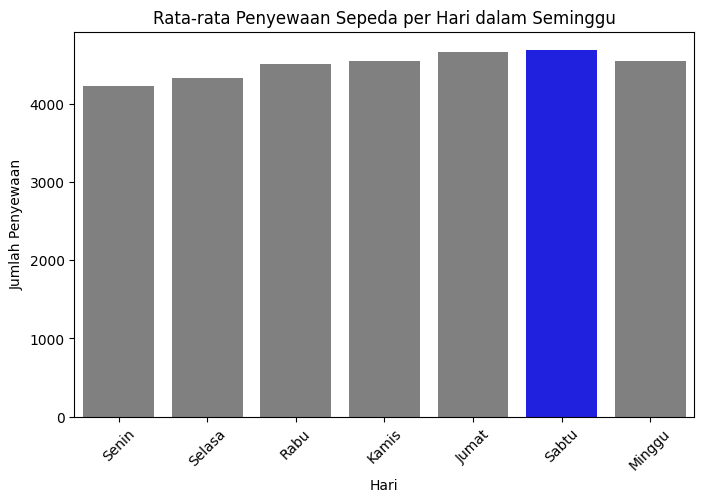

In [ ]:
df_day["weekday"] = df_day["weekday"].cat.rename_categories(["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"])
weekday_rentals = df_day.groupby("weekday")["cnt"].mean().reset_index()
plt.figure(figsize=(8,5))
palette = ["gray"] * len(weekday_rentals)
palette[weekday_rentals["cnt"].idxmax()] = "blue"
sns.barplot(x="weekday", y="cnt", data=weekday_rentals, palette=palette)
plt.title("Rata-rata Penyewaan Sepeda per Hari dalam Seminggu")
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=45)
plt.show()

**Insight :**
- Sabtu memiliki jumlah penyewaan tertinggi. Hal ini menunjukkan bahwa akhir pekan, khususnya Sabtu, adalah hari yang paling populer untuk penyewaan sepeda. Mungkin karena banyak orang memiliki waktu luang dan lebih cenderung beraktivitas di luar ruangan.

- Hari kerja memiliki tren penyewaan yang relatif stabil. Penyewaan sepeda di hari kerja (Senin-Jumat) tidak memiliki perbedaan signifikan satu sama lain. Ini bisa mengindikasikan bahwa banyak orang menggunakan sepeda sebagai sarana transportasi rutin, seperti untuk bekerja atau sekolah.

- Minggu tidak menjadi hari dengan penyewaan tertinggi. Meskipun masih termasuk akhir pekan, jumlah penyewaan di hari Minggu tampaknya sedikit lebih rendah dibandingkan Sabtu. Mungkin karena orang lebih memilih untuk beristirahat atau melakukan aktivitas lain selain bersepeda.



### Pertanyaan 2: Kapan waktu puncak penyewaan sepeda dalam sehari?

<ipython-input-37-5c65e8e105e5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hr_rentals = df_hour.groupby('hr')["cnt"].mean()


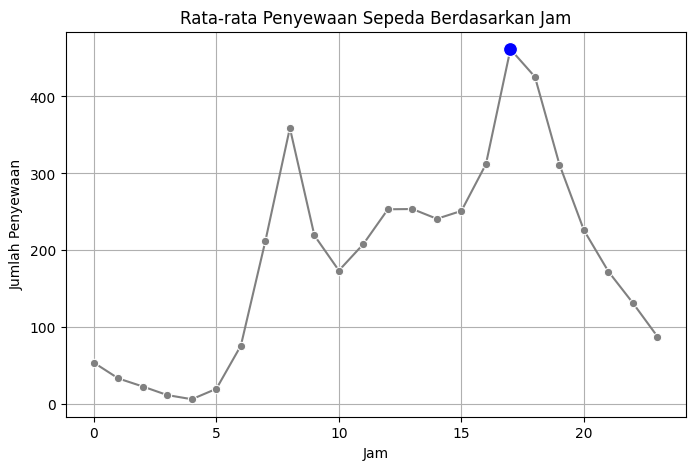

In [ ]:
plt.figure(figsize=(8,5))
palette = ["gray"] * 24
hr_rentals = df_hour.groupby('hr')["cnt"].mean()
palette[hr_rentals.idxmax()] = "blue"
sns.lineplot(x=hr_rentals.index, y=hr_rentals.values, marker='o', color="gray")
sns.scatterplot(x=[hr_rentals.idxmax()], y=[hr_rentals.max()], color="blue", s=100, zorder=3)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

**Insight :**
- Dua Puncak Penyewaan (Peak Hours) Terlihat Jelas. Puncak pertama terjadi pada pagi hari sekitar pukul 8 pagi, yang kemungkinan besar terkait dengan jam berangkat kerja atau sekolah.
Puncak kedua terjadi pada sore hingga malam sekitar pukul 17-18 (ditandai dengan titik biru pada grafik). Ini kemungkinan berhubungan dengan jam pulang kerja atau aktivitas rekreasi setelah jam kerja/sekolah.
- Dari pukul 0 hingga 5 pagi, jumlah penyewaan sangat rendah, menunjukkan bahwa sebagian besar orang tidak menggunakan sepeda pada jam tersebut.

### Pertanyaan 3 : Bagaimana pengaruh kecepatan angin terhadap penyewaan sepeda?

<ipython-input-40-559b7074fbe5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_rentals = df_day.groupby("wind_category")["cnt"].mean().reset_index()
<ipython-input-40-559b7074fbe5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="wind_category", y="cnt", data=wind_rentals, palette=palette)


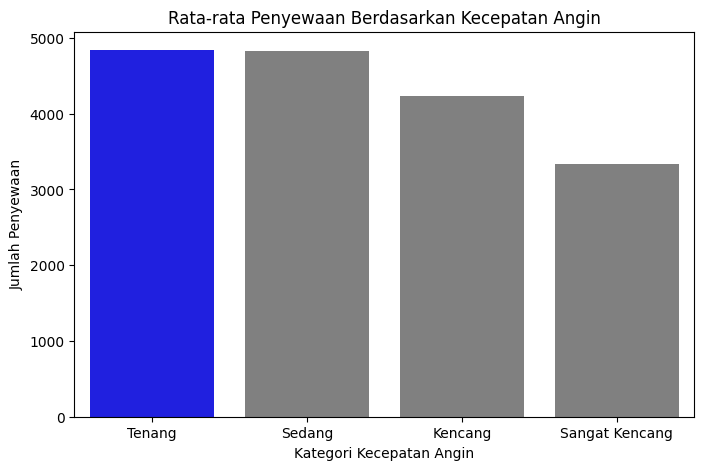

In [ ]:
df_day["wind_category"] = pd.cut(df_day["windspeed"], bins=[0, 0.1, 0.2, 0.3, 1], labels=["Tenang", "Sedang", "Kencang", "Sangat Kencang"])
wind_rentals = df_day.groupby("wind_category")["cnt"].mean().reset_index()
plt.figure(figsize=(8,5))
palette = ["gray"] * len(wind_rentals)
palette[wind_rentals["cnt"].idxmax()] = "blue"
sns.barplot(x="wind_category", y="cnt", data=wind_rentals, palette=palette)
plt.title("Rata-rata Penyewaan Berdasarkan Kecepatan Angin")
plt.xlabel("Kategori Kecepatan Angin")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight :**
- Jumlah penyewaan tertinggi terjadi saat angin dalam kondisi "Tenang" (ditandai dengan warna biru). Seiring meningkatnya kecepatan angin, jumlah penyewaan mengalami penurunan bertahap.
- Saat kecepatan angin mencapai kategori "Sangat Kencang", jumlah penyewaan sepeda turun drastis, yang menunjukkan bahwa angin kencang menjadi hambatan besar bagi pengguna sepeda.

### Pertanyaan 4: Bagaimana tren penyewaan sepeda berdasarkan musim?

<ipython-input-41-b886adec9d9f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_rentals = df_day.groupby("season")["cnt"].mean().reset_index()
<ipython-input-41-b886adec9d9f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=season_rentals, palette=palette)


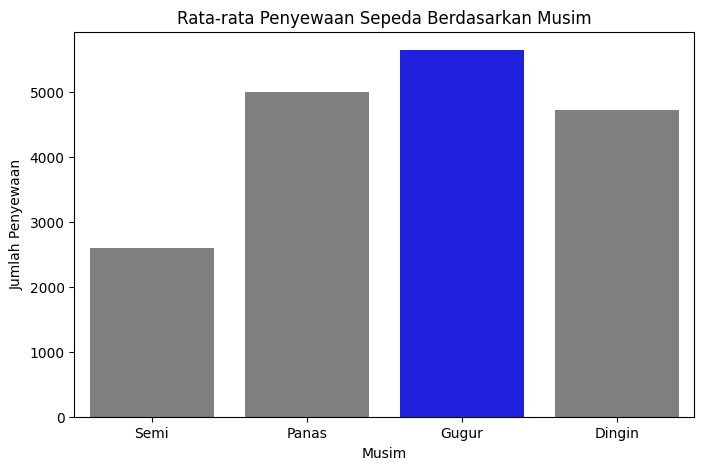

In [ ]:
df_day["season"] = df_day["season"].cat.rename_categories(["Semi", "Panas", "Gugur", "Dingin"])
season_rentals = df_day.groupby("season")["cnt"].mean().reset_index()
plt.figure(figsize=(8,5))
palette = ["gray"] * len(season_rentals)
palette[season_rentals["cnt"].idxmax()] = "blue"
sns.barplot(x="season", y="cnt", data=season_rentals, palette=palette)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight :**
- Musim gugur memiliki rata-rata penyewaan sepeda tertinggi, yang ditandai dengan batang berwarna biru. Ini menunjukkan bahwa musim gugur adalah waktu yang paling populer bagi orang-orang untuk menyewa sepeda.
- Musim semi memiliki jumlah penyewaan terendah, mungkin karena cuaca masih tidak menentu atau karena lebih banyak hujan.
Musim dingin memiliki lebih banyak penyewaan dibandingkan musim semi, tetapi masih lebih rendah dibandingkan musim panas dan gugur.

## Analisis Lanjutan (Opsional)

Untuk analisis lanjutan, saya menerapkan teknik clustering dengan mengkategorikan jumlah penyewaan sepeda per hari dengan kategori tertentu

### Pertanyaan 5 : Bagaimana distribusi penyewaan sepeda di berbagai kategori (sangat rendah, rendah, sedang, tinggi, sangat tinggi)?

In [ ]:
# Konversi kolom tanggal ke format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Clustering menggunakan Binning
# Membuat kategori berdasarkan jumlah penyewaan sepeda per hari
bins = [0, 2000, 4000, 6000, 8000, 10000]
labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
df_day['Rental_Category'] = pd.cut(df_day['cnt'], bins=bins, labels=labels)

# Menghitung jumlah total tanggal yang masuk dalam setiap kategori
category_counts = df_day['Rental_Category'].value_counts()
print("Jumlah total tanggal per kategori penyewaan:")
print(category_counts)

Jumlah total tanggal per kategori penyewaan:
Rental_Category
Sedang           272
Rendah           181
Tinggi           168
Sangat Rendah     98
Sangat Tinggi     12
Name: count, dtype: int64


**Insight :**
- Sebanyak 272 hari (sekitar 45% dari total hari) masuk dalam kategori Sedang, menunjukkan bahwa pola penyewaan sepeda relatif stabil di level menengah.
Ini menandakan bahwa sebagian besar waktu, jumlah penyewaan berada di sekitar rata-rata, tanpa fluktuasi ekstrem.

- Sebanyak 98 hari berada dalam kategori Sangat Rendah, yang bisa disebabkan oleh kondisi cuaca buruk, musim dingin, atau faktor lain yang mengurangi minat bersepeda.
Sementara itu, hanya 12 hari masuk dalam kategori Sangat Tinggi, menandakan bahwa lonjakan ekstrem dalam penyewaan sangat jarang terjadi.
Ini bisa mengindikasikan bahwa faktor khusus seperti event besar, promosi, atau liburan sangat memengaruhi kenaikan drastis dalam penyewaan.

## Conclusion

- **Conclution pertanyaan 1** => Sabtu menjadi hari paling populer untuk penyewaan sepeda, menunjukkan bahwa banyak orang lebih memilih bersepeda di akhir pekan untuk rekreasi atau aktivitas santai. Hal ini bisa dimanfaatkan dengan strategi promosi khusus di akhir pekan
- **Conclution pertanyaan 2** => Pola penyewaan sepeda menunjukkan dua puncak utama, yaitu sekitar pukul 8 pagi dan 17-18 sore, yang kemungkinan besar terkait dengan jam berangkat dan pulang kerja atau sekolah. Hal ini mengindikasikan bahwa sepeda banyak digunakan sebagai moda transportasi harian. Sementara itu, penyewaan sangat rendah terjadi pada pukul 0 hingga 5 pagi, menunjukkan bahwa sepeda jarang digunakan pada jam-jam tersebut. Pola ini dapat dimanfaatkan untuk mengoptimalkan ketersediaan sepeda pada jam sibuk serta mengembangkan strategi promosi untuk meningkatkan penggunaan di luar jam puncak.
- **Conclution pertanyaan 3** => Pengguna kemungkinan merasa lebih nyaman dan aman bersepeda dalam kondisi angin tenang atau sedang. Saat angin kencang, bersepeda bisa menjadi lebih sulit, tidak nyaman, atau bahkan berbahaya, terutama bagi pengendara yang tidak berpengalaman.
- **Conclution pertanyaan 4** => Penyewaan sepeda lebih populer di musim gugur dan panas, sementara lebih rendah di musim semi dan dingin.
- **Conclution pertanyaan 5** => Sebagian besar hari memiliki penyewaan di tingkat sedang, dengan jumlah hari penyewaan rendah dan tinggi yang cukup seimbang. Penyewaan ekstrem (sangat tinggi atau sangat rendah) jarang terjadi, menunjukkan bahwa ada faktor spesifik yang menyebabkan lonjakan atau penurunan drastis.